# K-means clustering

The notebook aims to study and implement a k-means clustering using "sklearn". The cartwheel dataset will be used to identify clusters automatically.


## Acknowledgments

- Data from https://www.coursera.org/ from the course "Understanding and Visualizing Data with Python" by University of Michigan


# Importing libraries

In [52]:
# Import the packages that we will be using
import pandas as pd                 # For data handling
import seaborn as sns               # For advanced plotting
import matplotlib.pyplot as plt     # For showing plots

# Note: specific functions of the "sklearn" package will be imported when needed to show concepts easily

# Importing data

In [88]:
# Define the col names for the iris dataset
colnames = ["Sepal_Length", "Sepal_Width","Petal_Length","Petal_Width", "Flower_Name"]

# url string that hosts our .csv file
url = "datasets/iris/iris.csv"

# Read the .csv file and store it as a pandas Data Frame
df = pd.read_csv(url, header = None, names = colnames )


# Undertanding and preprocessing the data

1. Get a general 'feel' of the data


In [89]:
print(df.shape)

df.head()


(150, 5)


,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width,Flower_Name
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


2. Drop rows with any missing values

In [90]:
#df = df.dropna()
#print(df.shape)
df 
df1 = df
df2 = df


3. Encoding the class label categorical column: from string to num


In [91]:
# Encoding the categorical column
df = df.replace({"Flower_Name":  {"Iris-setosa":0, "Iris-versicolor":1, "Iris-virginica":2} })
df1 = df1.replace({"Flower_Name":  {"Iris-setosa":0, "Iris-versicolor":1, "Iris-virginica":2} })
df2 = df2.replace({"Flower_Name":  {"Iris-setosa":0, "Iris-versicolor":1, "Iris-virginica":2} })

#Visualize the dataset
print(df)
print(df1)
print(df2)

# Note: this is not neesary for the cartwheel dataset, but it going to be very usefull for the Iris dataset

     Sepal_Length  Sepal_Width  Petal_Length  Petal_Width  Flower_Name
0             5.1          3.5           1.4          0.2            0
1             4.9          3.0           1.4          0.2            0
2             4.7          3.2           1.3          0.2            0
3             4.6          3.1           1.5          0.2            0
4             5.0          3.6           1.4          0.2            0
..            ...          ...           ...          ...          ...
145           6.7          3.0           5.2          2.3            2
146           6.3          2.5           5.0          1.9            2
147           6.5          3.0           5.2          2.0            2
148           6.2          3.4           5.4          2.3            2
149           5.9          3.0           5.1          1.8            2

[150 rows x 5 columns]
     Sepal_Length  Sepal_Width  Petal_Length  Petal_Width  Flower_Name
0             5.1          3.5           1.4         

4. Discard columns that won't be used


In [92]:

df1.drop(["Sepal_Width", "Sepal_Length"],axis='columns',inplace=True)

df2.drop(["Petal_Width", "Petal_Length"],axis='columns',inplace=True)

#Visualize the dataset
print(df1)
print(df2)

     Petal_Length  Petal_Width  Flower_Name
0             1.4          0.2            0
1             1.4          0.2            0
2             1.3          0.2            0
3             1.5          0.2            0
4             1.4          0.2            0
..            ...          ...          ...
145           5.2          2.3            2
146           5.0          1.9            2
147           5.2          2.0            2
148           5.4          2.3            2
149           5.1          1.8            2

[150 rows x 3 columns]
     Sepal_Length  Sepal_Width  Flower_Name
0             5.1          3.5            0
1             4.9          3.0            0
2             4.7          3.2            0
3             4.6          3.1            0
4             5.0          3.6            0
..            ...          ...          ...
145           6.7          3.0            2
146           6.3          2.5            2
147           6.5          3.0            2
148     

5. Scatter plot of the data

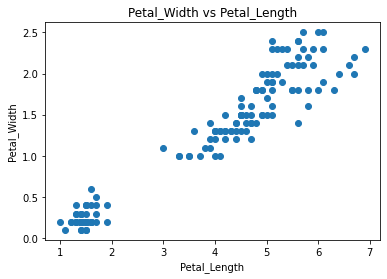

In [75]:
plt.scatter(df.Petal_Length,df.Petal_Width)
plt.title('Petal_Width vs Petal_Length')
plt.xlabel('Petal_Length')
plt.ylabel('Petal_Width')
plt.show()

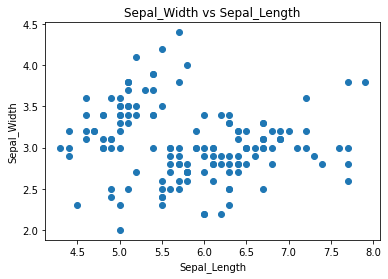

In [77]:

plt.scatter(df2.Sepal_Length,df2.Sepal_Width)
plt.title('Sepal_Width vs Sepal_Length')
plt.xlabel('Sepal_Length')
plt.ylabel('Sepal_Width')
plt.show()

6. Scatter plot of the data asigning each point to the cluster it belongs to ¡¡

<ipython-input-80-0d182659fffa>:5: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.scatter(df1Setosa.Petal_Length,df1Setosa.Petal_Width,Label='Setosa')
<ipython-input-80-0d182659fffa>:6: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.scatter(df1Versicolor.Petal_Length,df1Versicolor.Petal_Width,Label='Versicolor')
<ipython-input-80-0d182659fffa>:7: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.scatter(df1Virginica.Petal_Length,df1Virginica.Petal_Width,Label='Virginica')


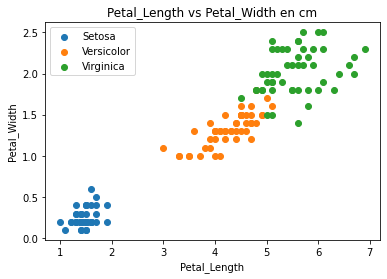

In [80]:
df1Setosa = df1[df1.Flower_Name == 0]
df1Versicolor = df1[df1.Flower_Name == 1]
df1Virginica = df1[df1.Flower_Name == 2]

plt.scatter(df1Setosa.Petal_Length,df1Setosa.Petal_Width,Label='Setosa')
plt.scatter(df1Versicolor.Petal_Length,df1Versicolor.Petal_Width,Label='Versicolor')
plt.scatter(df1Virginica.Petal_Length,df1Virginica.Petal_Width,Label='Virginica')

plt.title('Petal_Length vs Petal_Width en cm')
plt.xlabel('Petal_Length')
plt.ylabel('Petal_Width')
plt.legend()
plt.show()

<ipython-input-96-c27743c9ddf6>:5: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.scatter(df2Setosa.Sepal_Length,df2Setosa.Sepal_Width,Label='Setosa')
<ipython-input-96-c27743c9ddf6>:6: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.scatter(df2Versicolor.Sepal_Length,df2Versicolor.Sepal_Width,Label='Versicolor')
<ipython-input-96-c27743c9ddf6>:7: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.scatter(df2Virginica.Sepal_Length,df2Virginica.Sepal_Width,Label='Virginica')


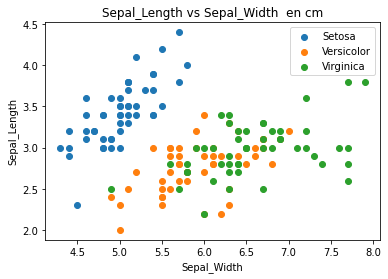

In [96]:
df2Setosa = df2[df2.Flower_Name == 0]
df2Versicolor = df2[df2.Flower_Name == 1]
df2Virginica = df2[df2.Flower_Name == 2]

plt.scatter(df2Setosa.Sepal_Length,df2Setosa.Sepal_Width,Label='Setosa')
plt.scatter(df2Versicolor.Sepal_Length,df2Versicolor.Sepal_Width,Label='Versicolor')
plt.scatter(df2Virginica.Sepal_Length,df2Virginica.Sepal_Width,Label='Virginica')

plt.title('Sepal_Length vs Sepal_Width  en cm')
plt.xlabel('Sepal_Width')
plt.ylabel('Sepal_Length')
plt.legend()
plt.show()

So, for this dataset we know in advance the class to which each point belongs to

# Kmeans clustering

Kmeans clustering

In [99]:
#Import sklearn KMeans
from sklearn.cluster import KMeans

# Define number of clusters
km = KMeans(n_clusters=3)

# Do K-means clustering (assing each point in the dataset to a cluster)
yp1 = km.fit_predict(df1[['Petal_Length','Petal_Width']])
yp2 = km.fit_predict(df2[['Sepal_Length','Sepal_Width']])
# Print estimated cluster of each point in the dataser
print(yp1)
print(yp2)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 1 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 1 1 1 1 2 1 1 1 1
 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1
 1 1]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 2 0 2 0 2 0 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2
 0 0 0 0 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 0 0 0 0 2 0 0 0 0
 0 0 2 2 0 0 0 0 2 0 2 0 2 0 0 2 2 0 0 0 0 0 2 2 0 0 0 2 0 0 0 2 0 0 0 2 0
 0 2]


In [100]:
# Add a new column to the dataset with the cluster information
df1["Cluster"] = yp1
df2["Cluster"] = yp2

# Visualize the dataset
print(df1)
print(df2)

     Petal_Length  Petal_Width  Flower_Name  Cluster
0             1.4          0.2            0        0
1             1.4          0.2            0        0
2             1.3          0.2            0        0
3             1.5          0.2            0        0
4             1.4          0.2            0        0
..            ...          ...          ...      ...
145           5.2          2.3            2        1
146           5.0          1.9            2        1
147           5.2          2.0            2        1
148           5.4          2.3            2        1
149           5.1          1.8            2        1

[150 rows x 4 columns]
     Sepal_Length  Sepal_Width  Flower_Name  Cluster
0             5.1          3.5            0        1
1             4.9          3.0            0        1
2             4.7          3.2            0        1
3             4.6          3.1            0        1
4             5.0          3.6            0        1
..            ...     

In [101]:
# Visualize the ID of the clusters
print(df1.Cluster.unique())
print(df2.Cluster.unique())

[0 2 1]
[1 0 2]


In [102]:
# Center of each cluster
km.cluster_centers_

array([[6.81276596, 3.07446809],
       [5.006     , 3.428     ],
       [5.77358491, 2.69245283]])

In [103]:
# Sum of squared error
km.inertia_

37.0507021276596

<span style='color:Blue'> **Important remarks**  </span>

- The number of each cluster is randomly assigned
- The order of the number in each cluster is random

# Plot estimated clusters

Plot estimated clusters

<ipython-input-108-5bc7e6cfb4a1>:5: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.scatter(df1c1.Petal_Length, df1c1.Petal_Width, Label='Estimated Flower Group 1')
<ipython-input-108-5bc7e6cfb4a1>:6: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.scatter(df1c2.Petal_Length, df1c2.Petal_Width, Label='Estimated Flower Group 2')
<ipython-input-108-5bc7e6cfb4a1>:7: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.scatter(df1c3.Petal_Length, df1c3.Petal_Width, Label='Estimated Flower Group 3')


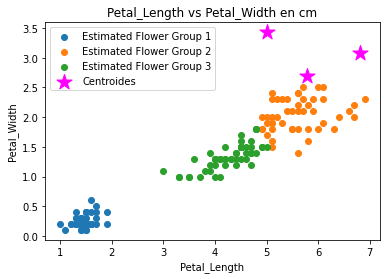

In [108]:
df1c1 = df1[df1.Cluster==0]
df1c2 = df1[df1.Cluster==1]
df1c3 = df1[df1.Cluster==2]

plt.scatter(df1c1.Petal_Length, df1c1.Petal_Width, Label='Estimated Flower Group 1')
plt.scatter(df1c2.Petal_Length, df1c2.Petal_Width, Label='Estimated Flower Group 2')
plt.scatter(df1c3.Petal_Length, df1c3.Petal_Width, Label='Estimated Flower Group 3')

plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], color='magenta', marker='*', label='Centroides', s=256)

plt.title('Petal_Length vs Petal_Width en cm')
plt.xlabel('Petal_Length')
plt.ylabel('Petal_Width')
plt.legend()
plt.show()

Plot real clusters and visual comparison

<ipython-input-109-f2eb7918e2b2>:5: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.scatter(df2c1.Sepal_Length, df2c1.Sepal_Width, Label='Estimated Flower Group 1')
<ipython-input-109-f2eb7918e2b2>:6: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.scatter(df2c2.Sepal_Length, df2c2.Sepal_Width, Label='Estimated Flower Group 2')
<ipython-input-109-f2eb7918e2b2>:7: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.scatter(df2c3.Sepal_Length, df2c3.Sepal_Width, Label='Estimated Flower Group 3')


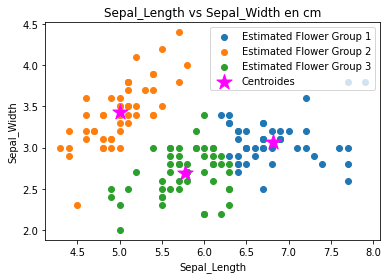

In [109]:
df2c1 = df2[df2.Cluster==0]
df2c2 = df2[df2.Cluster==1]
df2c3 = df2[df2.Cluster==2]

plt.scatter(df2c1.Sepal_Length, df2c1.Sepal_Width, Label='Estimated Flower Group 1')
plt.scatter(df2c2.Sepal_Length, df2c2.Sepal_Width, Label='Estimated Flower Group 2')
plt.scatter(df2c3.Sepal_Length, df2c3.Sepal_Width, Label='Estimated Flower Group 3')

plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], color='magenta', marker='*', label='Centroides', s=256)

plt.title('Sepal_Length vs Sepal_Width en cm')
plt.xlabel('Sepal_Length')
plt.ylabel('Sepal_Width')
plt.legend()
plt.show()

# Selecting K: elbow plot

Check the acurracy of the model using k-fold cross-validation

In [112]:
sse = []
k_rng = range(1,10)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit_predict(df1[['Petal_Length','Petal_Width']])
    sse.append(km.inertia_)

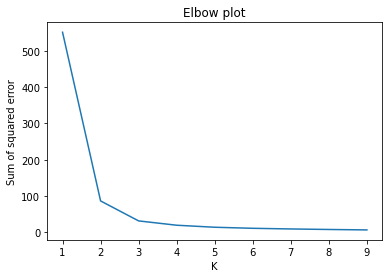

In [113]:
plt.plot(k_rng,sse)

plt.title('Elbow plot')
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.show()

In [114]:
sse = []
k_rng = range(1,10)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit_predict(df2[['Sepal_Length','Sepal_Width']])
    sse.append(km.inertia_)

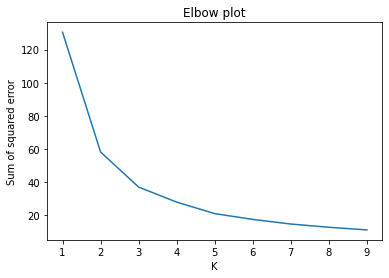

In [115]:

plt.plot(k_rng,sse)

plt.title('Elbow plot')
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.show()

In [116]:
# Define number of clusters
km = KMeans(n_clusters=6)

# Do K-means clustering (assing each point in the dataset to a cluster)
yp = km.fit_predict(df[['Sepal_Length','Sepal_Width', 'Petal_Length', 'Petal_Width']])

# Print estimated cluster of each point in the dataser
yp

array([3, 0, 0, 0, 3, 3, 0, 3, 0, 0, 3, 0, 0, 0, 3, 3, 3, 3, 3, 3, 3, 3,
       0, 3, 0, 0, 3, 3, 3, 0, 0, 3, 3, 3, 0, 0, 3, 3, 0, 3, 3, 0, 0, 3,
       3, 0, 3, 0, 3, 0, 4, 4, 4, 2, 4, 2, 4, 2, 4, 2, 2, 2, 2, 4, 2, 4,
       2, 2, 4, 2, 4, 2, 4, 4, 4, 4, 4, 4, 4, 2, 2, 2, 2, 4, 2, 4, 4, 4,
       2, 2, 2, 4, 2, 2, 2, 2, 2, 4, 2, 2, 1, 4, 5, 1, 1, 5, 2, 5, 1, 5,
       1, 1, 1, 4, 1, 1, 1, 5, 5, 4, 1, 4, 5, 4, 1, 5, 4, 4, 1, 5, 5, 5,
       1, 4, 4, 5, 1, 1, 4, 1, 1, 1, 4, 1, 1, 1, 4, 1, 1, 4])

In [117]:
# Add a new column to the dataset with the cluster information
df["Cluster"] = yp

# Visualize the dataset
print(df)

     Sepal_Length  Sepal_Width  Petal_Length  Petal_Width  Flower_Name  \
0             5.1          3.5           1.4          0.2            0   
1             4.9          3.0           1.4          0.2            0   
2             4.7          3.2           1.3          0.2            0   
3             4.6          3.1           1.5          0.2            0   
4             5.0          3.6           1.4          0.2            0   
..            ...          ...           ...          ...          ...   
145           6.7          3.0           5.2          2.3            2   
146           6.3          2.5           5.0          1.9            2   
147           6.5          3.0           5.2          2.0            2   
148           6.2          3.4           5.4          2.3            2   
149           5.9          3.0           5.1          1.8            2   

     Cluster  
0          3  
1          0  
2          0  
3          0  
4          3  
..       ...  
145   

In [118]:
# Visualize the ID of the clusters
print(df.Cluster.unique())

[3 0 4 2 1 5]


In [119]:
# Center of each cluster
km.cluster_centers_

array([[4.70454545, 3.12272727, 1.41363636, 0.2       ],
       [6.52916667, 3.05833333, 5.50833333, 2.1625    ],
       [5.53214286, 2.63571429, 3.96071429, 1.22857143],
       [5.24285714, 3.66785714, 1.5       , 0.28214286],
       [6.24722222, 2.84722222, 4.775     , 1.575     ],
       [7.475     , 3.125     , 6.3       , 2.05      ]])

In [120]:
# Sum of squared error
km.inertia_


39.066035353535376

In [122]:
sse = []
k_rng = range(1,10)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit_predict(df[['Sepal_Length','Sepal_Width', 'Petal_Length', 'Petal_Width']])
    sse.append(km.inertia_)

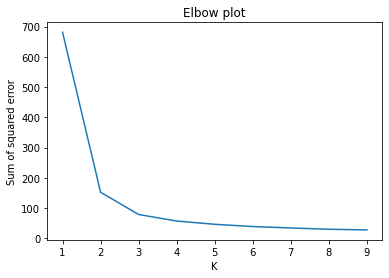

In [123]:
plt.plot(k_rng,sse)

plt.title('Elbow plot')
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.show()

<span style='color:Blue'> **Important remarks**  </span>

According to the Elbot plot, the selected K agree with the real number of clusters



# Final remarks

- K-Means clustering algorithm is perhaps the simplest and most popular unsupervised learning algorithm

- The number of clusters have to be defined by the user (i.e., by you ¡¡)

- The number assigned to each cluster is randomly assigned from set 0, 1, 2

- The order of the number in each cluster is random

- The **sklearn** package provides the tools for data processing suchs as k-means

# Activity: work with the iris dataset

 - For the following cases, do Kmean and without using min max scaling: determine whether the scaling benefits or not
 
 - Also, compute and show the elbow plot
    
1. Do clustering with the iris flower dataset to form clusters using as features petal width and length. Drop out the other two features (sepal width and length) for simplicity.


2. Do clustering with the iris flower dataset to form clusters using as features sepal width and length. Drop out the other two features (petal width and length) for simplicity.


3. Do clustering with the iris flower dataset to form clusters using as features sepal and petal width and length. Notice that scatter plots here are not possible





5. Draw conclusiones:
    - About the scalling: does it helps or not?
    - About the elbow plot: does the K agree with the real number of clusters? En el caso de Petal , se puede observar que coloca los centroides , fuera de los clusters
    - Comparison between (i) sepal features alone, (ii) petal features alone, and (ii) both sepal with petal features: which one is better/worse? Why? Comparandolo , en el caso de petal no hay tanta coincidencia , pero para Sepal , es un poco mas exacto.